<a href="https://colab.research.google.com/github/Jack3690/Rad/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def relu(z): 
  return np.maximum(0,z),z
 
def sigmoid(z): 
  return 1/(1+np.exp(-z)),z

def relu_backward(dA,z):
  gz=np.maximum(0,z/z)
  return dA*gz

def sigmoid_backward(dA,z):
  s,_=sigmoid(z)
  gz=s*(1-s)
  
  return dA*gz


In [7]:
def initialize_parameters_deep(layer_dims):

  parameters={}
  np.random.seed(3)
  L=len(layer_dims)
  for l in range(1,L):
 
    parameters['W'+str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*np.sqrt(1/layer_dims[l-1])
    parameters['b'+str(l)] = np.zeros((layer_dims[l],1))
  
  return parameters

In [8]:
def linear_forward(A,W,b):
  z=np.dot(W,A)+b

  cache=(A,W,b)

  return z,cache

def linear_activation_forward(A_prev, W, b, activation):

  if activation=="relu":
    z,linear_cache = linear_forward(A_prev,W,b)
    A,activation_cache=relu(z)

  elif activation=="sigmoid":
    z,linear_cache = linear_forward(A_prev,W,b)
    A,activation_cache=sigmoid(z)
  
  cache=(linear_cache,activation_cache)

  return A,cache

def L_model_forward(X,parameters):

  caches=[]
  A=X
  L=len(parameters)//2

  for l in range(1,L):
    A_prev=A
    A, cache = linear_activation_forward(A_prev, parameters["W"+str(l)], parameters["b"+str(l)], "relu")
    caches.append(cache)

  AL, cache = linear_activation_forward(A, parameters["W"+str(L)],parameters["b"+str(L)], "sigmoid")
  caches.append(cache)

  return AL,caches

In [62]:
def compute_cost(AL, Y, parameters):

    m = Y.shape[1]
    L=len(parameters)//2
    L2_regularization_cost=0

    for l in range(1,L+1):
      W=parameters['W'+str(l)]
      L2_regularization_cost+=np.sum(np.dot(W,W.T))

    L2_regularization_cost*= (lambd/(2*m))

    cost = -np.sum(np.multiply(np.log(AL),Y)+np.multiply(np.log(1-AL),1-Y))/m +  L2_regularization_cost
    cost = np.squeeze(cost)      
    return cost

In [49]:
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ,A_prev.T)/m + (lambd*W)/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)

    return dA_prev, dW, db

In [50]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db =  linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

In [38]:
def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    for l in reversed(range(L-1)):

        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [39]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) //2
    for l in range(L):
        parameters["W" + str(l+1)] -=learning_rate*grads["dW"+str(l+1)]
        parameters["b" + str(l+1)] -=learning_rate*grads["db"+str(l+1)]

    return parameters

In [40]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    np.random.seed(1)
    assert(Y.shape[0]==1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)

    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
  
        cost = compute_cost(AL, Y,parameters)
  
        grads = L_model_backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [15]:
def predict(X,Y,parameters):
  AL,_=L_model_forward(X,parameters)
  prediction=AL
  prediction[np.where(AL>0.5)]=1
  prediction[np.where(AL<=0.5)]=0
  accuracy=100 - np.mean(np.abs(prediction-Y))*100
  return accuracy


In [19]:
!git clone https://github.com/Jack3690/Rad


fatal: destination path 'Rad' already exists and is not an empty directory.


In [22]:
cd Rad

/content/Rad


In [23]:
def load_data(file):
  hf = h5py.File(file, 'r')
  classes =hf.get(list(hf.keys())[0])
  x_data=np.array(hf[list(hf.keys())[1]])
  y_data=np.array(hf[list(hf.keys())[2]])
  y_data=y_data.reshape(1,y_data.shape[0])
  return classes,x_data,y_data

In [24]:
import h5py
classes,train_x_orig,train_y=load_data('train_catvnoncat.h5')
_,test_x_orig,test_y=load_data('test_catvnoncat.h5')

In [25]:
train_x_flatten=train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten=test_x_orig.reshape(test_x_orig.shape[0],-1).T

In [26]:
train_x=train_x_flatten/255
test_x=test_x_flatten/255

In [35]:
layers_dims=[int(train_x.shape[0]),20,7,5,1]
lambd=0.01

Cost after iteration 0: 0.723809
Cost after iteration 100: 0.653380
Cost after iteration 200: 0.637763
Cost after iteration 300: 0.585145
Cost after iteration 400: 0.542754
Cost after iteration 500: 0.523246
Cost after iteration 600: 0.500900
Cost after iteration 700: 0.450073
Cost after iteration 800: 0.494145
Cost after iteration 900: 0.420148
Cost after iteration 1000: 0.372088
Cost after iteration 1100: 0.338701
Cost after iteration 1200: 0.312646
Cost after iteration 1300: 0.291547
Cost after iteration 1400: 0.273645
Cost after iteration 1500: 0.263730
Cost after iteration 1600: 0.176902
Cost after iteration 1700: 0.189976
Cost after iteration 1800: 0.261136
Cost after iteration 1900: 0.332810
Cost after iteration 2000: 0.203919
Cost after iteration 2100: 0.079507
Cost after iteration 2200: 0.061879
Cost after iteration 2300: 0.050367
Cost after iteration 2400: 0.041688


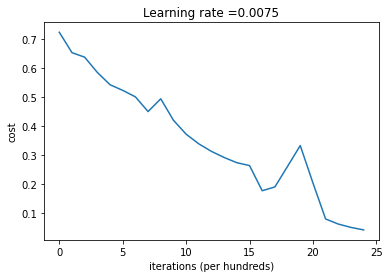

In [63]:
parameters=L_layer_model(train_x, train_y, layers_dims, learning_rate=0.0075, num_iterations=2500, print_cost=True)


In [64]:
print(predict(test_x,test_y,parameters))

42.00000000000001
